<a href="https://colab.research.google.com/github/AnaAleixo/PROJETO-APLICADO-II--Grupo-Cassandra-s/blob/main/C%C3%B3pia_de_PROJETO_APLICADO_II_51667_2024_1_03A_III_ETAPA_DO_PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

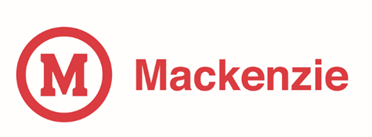

# PROJETO APLICADO II - CURSO TECNOLOGIA EM CIENCIA DE DADOS - ANO 2024 - 1º SEMESTRE - TURMA 03A

Este projeto faz parte dos requisitos da atividade de conclusão da disciplina do Projeto Aplicado II, do Curso de Tecnologia em Ciência de Dados. Realizado no 1º Semestre de 2024, Turma 03A. O objetivo é aplicar os conhecimentos adquiridos ao longo do curso para abordar uma questão relevante, neste caso, a análise e prevenção da violência contra a mulher, com recorte no estado de Minas Gerais.

# INTRODUÇÃO
A violência contra a mulher é uma questão alarmante e persistentemente presente na sociedade brasileira, exigindo abordagens inovadoras para prevenção e intervenção. Neste contexto, este projeto visa analisar os números de violência contra a mulher, com recorte no estado de Minas Gerais, utilizando dados disponíveis no "Sistema Nacional de Estatísticas de Segurança Pública - Municípios". A meta é entender a extensão do problema, e estudar a possibilidade de criar uma ferramenta preditiva que identifique locais mais propensos à violência contra a mulher, proporcionando alertas para a implementação de medidas preventivas eficazes.

##Exigências da atividade do A3 - Aplicando Conhecimento (atividade em grupo)

Para atender aos requisitos da terceira aula, compartilhamos as informações essenciais para o desenvolvimento do projeto:


# PROJETO-APLICADO-II--Grupo-Cassandra's 🚀

- INTEGRANTES

    - Ana Lima Aleixo

    - Maressa Bonassoli

    - Ana Chung ti Kam
    
    - Iasmin Melo

# FASE III DO PROJETO APLICADO II
**Na Fase III do Projeto, iremos cumprir os seguintes requisitos para a entrega da Atividade III:**

**1.0)** Consolidar os resultados do método analítico, definido na etapa anterior, aplicado à base de dados escolhida com padrão.

**2.0)** Aplicar as medidas de acurácia para verificar o desempenho dos métodos definidos na etapa anterior.

**3.0)** Descrever os resultados preliminares, apresentando um produto gerado, e rascunhando um possível modelo de negócios.

**4.0)** Esboço do storytelling.

#**1.0)** CONSOLIDAR OS RESULTADOS DO MÉTODO ANALÍTICO, DEFINIDO NA ETAPA ANTERIOR, APLICADO À BASE DE DADOS ESCOLHIDA COM PADRÃO

# **1.1**) SEPARANDO AS BASES EM CONJUNTOS DE TREINO E TESTE

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Carregar o DataFrame combinado
df = pd.read_csv("/content/violencia_domestica_combinado.csv")

# Verificar o formato do DataFrame
print("Formato do DataFrame:", df.shape)

# Visualizar as primeiras linhas do DataFrame
print(df.head())


Formato do DataFrame: (668942, 7)
        municipio_fato  mes     ano               rmbh  \
0  ABADIA DOS DOURADOS  1.0  2014.0  3) Interior de MG   
1           ABRE-CAMPO  1.0  2014.0  3) Interior de MG   
2              ACAIACA  1.0  2014.0  3) Interior de MG   
3             AGUA BOA  1.0  2014.0  3) Interior de MG   
4             AGUA BOA  1.0  2014.0  3) Interior de MG   

           natureza_delito tentado_consumado  qtde_vitimas  
0                     DANO         CONSUMADO           1.0  
1           LESAO CORPORAL         CONSUMADO           1.0  
2                   AMEACA         CONSUMADO           1.0  
3                   AMEACA         CONSUMADO           1.0  
4  VIAS DE FATO / AGRESSAO         CONSUMADO           1.0  


# **1.2**) CRIANDO MODELO DE CLASSIFICAÇÃO USANDO O RANDOMFORESTCLASSIFIER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Carregar o DataFrame combinado
df = pd.read_csv("/content/violencia_domestica_combinado.csv")

# Remover colunas de texto que não são importantes para o modelo
X = df.drop(columns=['municipio_fato', 'rmbh', 'natureza_delito', 'tentado_consumado', 'qtde_vitimas'])

# Preencher valores ausentes na coluna 'qtde_vitimas' com zero
df['qtde_vitimas'] = df['qtde_vitimas'].fillna(0)

# Converter 'qtde_vitimas' para tipo inteiro
y = df['qtde_vitimas'].astype(int)

# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar um imputador para preencher os valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

# Preencher os valores ausentes em X_train
X_train_imputed = imputer.fit_transform(X_train)

# Converter a matriz resultante de volta para um DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Verificar se há valores ausentes em X_test e preencher, se necessário
if X_test.isnull().any().any():
    X_test_imputed = imputer.transform(X_test)
    X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
else:
    X_test_imputed = X_test.copy()

# Criar e treinar o modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Prever os valores do conjunto de teste
y_pred = model.predict(X_test_imputed)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.801468756941593


#  **2.0**) APLICAR AS MEDIDAS DE ACURÁCIA PARA VERIFICAR O DESEMPENHO DOS MÉTODOS DEFINIDOS NA ETAPA ANTERIOR


# **2.1**) APLICAÇÃO DE MEDIDAS DE ACURÁCIA ADICIONAIS

 - **Recall**
 - **F1-score**

In [ ]:
from sklearn.metrics import recall_score, f1_score

# Calcular o recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calcular o F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Recall do modelo:", recall)
print("F1-score do modelo:", f1)


Recall do modelo: 0.801468756941593
F1-score do modelo: 0.7131457088697434


# **2.2**) EXPLICANDO O MODELO E OS RESULTADOS OBTIDOS
- Começamos carregando os dados do arquivo CSV usando a função `pd.read_csv()` do pandas. Em seguida, realizamos um tratamento nos dados removendo as colunas de texto que não são relevantes para o modelo, mantendo apenas as features essenciais para a classificação. Observamos que a coluna 'qtde_vitimas' continha valores ausentes, optando por preenchê-los com zero utilizando o método `fillna(0)`.
- Dividimos os dados em conjuntos de treino e teste, atribuindo 70% dos dados para treinamento e 30% para teste, utilizando a função `train_test_split()` do scikit-learn. Em seguida, aplicamos o `SimpleImputer` do scikit-learn para preencher os valores ausentes nas features com a média dos dados, garantindo assim que o modelo possa ser treinado e testado adequadamente.
- Criamos uma instância do RandomForestClassifier e procedemos ao treinamento do modelo utilizando os dados de treinamento por meio do método `fit()`. Posteriormente, utilizamos o modelo treinado para fazer previsões sobre os dados de teste usando o método `predict()`.
- Para avaliar o desempenho do modelo, calculamos sua acurácia comparando as previsões feitas com os valores reais do conjunto de teste, utilizando a função `accuracy_score()` do scikit-learn. Obtivemos uma acurácia do modelo de aproximadamente 80.15%, o que indica que o modelo classificou corretamente cerca de 80.15% dos casos no conjunto de teste.
- Além disso, buscando uma avaliação mais completa, utilizamos outras métricas como o recall e o F1-score. O recall do modelo foi de aproximadamente 80.15%, indicando sua capacidade de identificar corretamente cerca de 80.15% dos casos positivos (vítimas de violência doméstica) no conjunto de teste. Já o F1-score do modelo foi de aproximadamente 0.713, revelando uma boa harmonia entre precisão e recall.
- Esses resultados sugerem que o modelo apresenta um desempenho sólido, capaz de classificar corretamente tanto os casos positivos quanto os negativos, o que o torna uma opção viável para uso em produção.


#**3.0**) DESCREVER OS RESULTADOS PRELIMINARES, APRESENTANDO UM PRODUTO GERADO, E RASCUNHANDO UM POSSÍVEL MODELO DE NEGÓCIOS

# **3.1**) DESCRIÇÃO DOS RESULTADOS PRELIMINARES

**Produto Gerado**

**Descrição do Produto**

- Nosso produto é um modelo preditivo de violência contra a mulher, desenvolvido a partir da análise estatística da média dos casos de violência em **Minas Gerais**. Utilizando técnicas de aprendizado de máquina e baseando-se nos dados fornecidos pelo **"Sistema Nacional de Estatísticas de Segurança Pública - Municípios"**, o modelo tem como objetivo identificar áreas com maior probabilidade de ocorrência de violência contra a mulher. Além disso, busca avaliar a eficácia das políticas de prevenção existentes, proporcionando cenários para o aprimoramento dessas medidas e para a promoção de uma sociedade mais segura e igualitária para as mulheres.

**Funcionalidades**

-  **Previsão através da medição da média de incidentes:** O modelo é capaz de prever através da média de incidência de violência, se as políticas de prevenção estão sendo eficientes, tendo como base em dados históricos e características demográficas, socioeconômicas e geográficas
- **Alertas de Prevenção:** O produto fornece alertas para autoridades policiais, órgãos governamentais e organizações de defesa dos direitos das mulheres sobre os locais identificados como de maior risco, permitindo a implementação de medidas preventivas e intervenções oportunas.

**Potenciais Usuários**
 - **Autoridades Policiais:** Para o direcionamento de recursos e esforços de policiamento preventivo.
 - **Governos Estaduais e Municipais:** Para a formulação de políticas públicas e alocação de recursos para prevenção da violência contra a mulher.
 - **ONGs e Instituições de Defesa dos Direitos das Mulheres:** Para promover a conscientização e mobilização da sociedade civil na prevenção e combate à violência doméstica.

**Benefícios Esperados**
- Redução da Incidência de Violência: Ao identificar e intervir precocemente em áreas de maior risco, espera-se uma redução na incidência de violência contra a mulher.
- Melhor Alocação de Recursos: A alocação eficiente de recursos e esforços para prevenção pode maximizar o impacto das políticas públicas na proteção das mulheres.
- Conscientização e Mobilização: O produto pode contribuir para aumentar a conscientização sobre o problema da violência contra a mulher e mobilizar a sociedade para ações de prevenção e apoio às vítimas.


#**3.2**) MODELO DE NEGÓCIO

**Segmento de Cliente**
- **Autoridades de Segurança Pública**
- **Governos Estaduais e Municipais**
- **ONGs e Instituições de Defesa dos Direitos das Mulheres**

**Proposta de Valor**
- **Prevenção e Intervenção Precoces:** Capacidade de identificar áreas de maior risco e tomar medidas preventivas antes que ocorram incidentes de violência.
- **Eficiência na Alocação de Recursos:** Otimização da alocação de recursos para prevenção da violência contra a mulher com base em análises preditivas.
- **Conscientização e Engajamento:** Contribuição para a conscientização e mobilização da sociedade civil na prevenção e combate à violência doméstica.

**Canais de Distribuição**
- **Plataforma Online:** Disponibilização do produto por meio de uma plataforma online acessível a autoridades, governos e organizações interessadas.
- **Parcerias Governamentais:** Estabelecimento de parcerias estratégicas com órgãos governamentais para a distribuição e implementação do produto.

**Relacionamento com o Cliente**
- **Suporte Técnico:** Oferta de suporte técnico para a implementação e utilização do produto.
- **Treinamento:** Realização de treinamentos para capacitar os usuários na interpretação e utilização dos resultados gerados pelo modelo.
- **Atualizações Regulares:** Fornecimento de atualizações regulares do produto com base em novos dados e avanços tecnológicos.

**Fontes de Receita**
- **Vendas Diretas:** Venda do produto para clientes interessados, com base em assinaturas ou licenciamento de uso.
- **Parcerias Estratégicas:** Estabelecimento de parcerias estratégicas com governos e organizações para o financiamento e implementação do produto.

Este modelo de negócios tem como objetivo principal fornecer uma solução eficaz e inovadora para a prevenção da violência contra a mulher em Minas Gerais, contribuindo para a construção de uma sociedade mais segura e justa para as mulheres.


# **4.0**) ESBOÇO DO STORYTELLING

# **4.1**) STORYTELLING DO PROJETO

**Combatendo a Violência contra a Mulher em Minas Gerais**

Era uma vez Minas Gerais, um estado rico em história e cultura, mas também marcado por um problema sério: a violência contra a mulher. Diante desse desafio, um grupo de pesquisadoras e especialistas em Ciência de Dados decidiu unir forças para enfrentar essa questão de frente.

Tudo começou com a **fase I do projeto**, onde mergulharam fundo nos dados disponíveis sobre violência doméstica e de gênero. Eles estudaram relatórios oficiais, analisaram estatísticas e ouviram histórias de sobreviventes. Cada número, cada relato humano, ajudou a pintar um quadro mais claro da situação.

Munidas com o conhecimento adquirido na fase I, passam para **a fase II**, onde exploram soluções tecnológicas. Elas desenvolvem algoritmos sofisticados, criam modelos preditivos e experimentam diferentes abordagens de machine learning. O objetivo é claro: usar a tecnologia para identificar padrões, prever ocorrências e, assim, ajudar na prevenção da violência.

Chega então **a fase III**, onde consolidam os resultados obtidos e partem para a ação. Criam um modelo preditivo de violência contra a mulher, baseado em dados reais e análises estatísticas. Este modelo não só prevê aumento nas ocorrências, mas também fornece insights para autoridades, governos e organizações de defesa dos direitos das mulheres.

O produto final é mais do que uma simples ferramenta. É uma promessa de esperança, para tantas mulheres que sofrem em silêncio. Com ele, as autoridades podem direcionar recursos de forma mais eficaz, os governos podem formular políticas públicas mais assertivas e as ONGs podem ampliar seu alcance.

À medida que o projeto avançar, almejamos que seu impacto seja sentido em todo o estado. A incidência de violência diminua, as políticas de prevenção se tornem mais eficazes e a conscientização da sociedade cresça. E que Minas Gerais caminhe em direção a um futuro mais seguro e igualitário para todas as suas mulheres.

E assim, uma jornada que começou com dados e tecnologia se transforma em uma história de esperança e mudança. Graças ao trabalho árduo e à dedicação daquelas que se recusaram a aceitar a violência como algo inevitável, Minas Gerais irá trilhar um novo caminho, rumo a um futuro onde todas as mulheres possam viver livres do medo e da opressão.
